# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
import os
if os.name == 'posix':
    env = UnityEnvironment(file_name="./Banana.app")
elif os.name == 'nt':
    env = UnityEnvironment(file_name="./Banana_Windows_x86_64/banana.exe")
else:
    raise Exception('Cannot find the right banana.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print(brain_name)

BananaBrain


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import pickle
import torch
import time
import os
from ddqn_agent import DDQNAgent
from collections import deque

scores_window = deque(maxlen=100)  # last 100 scores
all_scores = []
n_episodes = 2000

device = 'cuda' if torch.cuda.is_available() else 'cpu'
agent = DDQNAgent(state_size, action_size, device)

start_time = time.time()
cur5sec_steps = 0
last5sec_steps = 0

for i_episode in range(1, n_episodes + 1):
    env_info = env.reset(train_mode = True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    step_count = 0
    score = 0
    
    while True:
        # let the agent choose an action in the given state
        action = agent.act(state)
        
        # take one step in the environment using the chosen action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        
        # find out the effect of the action from the environment
        reward = env_info.rewards[0]                   # get the reward
        next_state = env_info.vector_observations[0]   # get the next state
        done = env_info.local_done[0]                  # see if episode has finished
        
        # inform the agent about the result of the action
        agent.step(state, action, reward, next_state, done)

        # roll over the state to next time step
        score += reward                                # update the score
        state = next_state                             
        
        step_count += 1
        
        # compute how fast we are working
        cur5sec_steps += 1
        end_time = time.time()
        if end_time - start_time > 5:
            last5sec_steps = cur5sec_steps
            cur5sec_steps = 0
            start_time = time.time()
        
        #print(f'\rEp:{i_episode} ({last5sec_steps} steps/5s), ep_score={score}, buffer={len(agent.replay_buffer)}', end='')

        # exit loop if episode finished
        if done:                                       
            break

    scores_window.append(score)       # save most recent score
    all_scores.append(score)
    
    if i_episode % 100 == 0:
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}')

    if np.mean(scores_window) > 13:
        print(f'\nEnvironment solved in {i_episode-100:d} episodes!\tAverage Score: {np.mean(scores_window):.2f}')
        agent.save()
        break


Episode 100	Average Score: 1.26
Episode 200	Average Score: 1.78
Episode 300	Average Score: 4.29
Episode 400	Average Score: 6.06
Episode 500	Average Score: 8.35
Episode 600	Average Score: 12.02

Environment solved in 559 episodes!	Average Score: 13.02


## Score For All Episodes

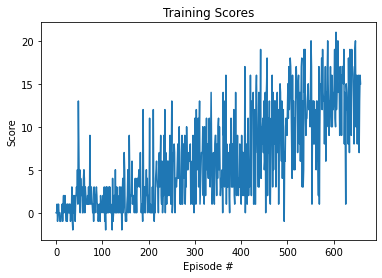

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(all_scores)), all_scores)
plt.title('Training Scores')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Last 100 Episode Score

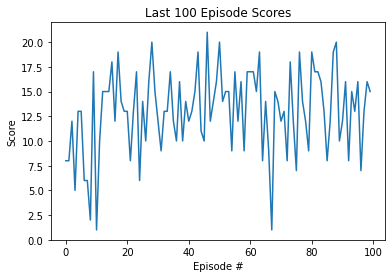

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_window)), scores_window)
plt.title('Last 100 Episode Scores')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Agent Simulation From Saved Weights

The following cell will load the saved weights and start banana simulation.

Weights are saved in **qnetwork.pt**

In [13]:
import torch
from ddqn_agent import DDQNAgent

agent = DDQNAgent(state_size, action_size, 'cuda' if torch.cuda.is_available() else 'cpu')

filename = './qnetwork.pt'
print(f'loading weights from {filename}')

agent.load(filename)
agent.eval()

score = 0

env_info = env.reset(train_mode = False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
done = False

while not done:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment

    reward = env_info.rewards[0]                   # get the reward
    next_state = env_info.vector_observations[0]   # get the next state
    done = env_info.local_done[0]                  # see if episode has finished
    
    if done:
        print('Done')

    score += reward                                # update the score
    state = next_state                             

print(f'Score: {score}')

loading weights from ./qnetwork.pt
Done
Score: 19.0
